# Bike Sharing Demand

### Forecast use of a city bicycleshare system in Washington D.C.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import scipy

In [90]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")

In [91]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [92]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [93]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [94]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [95]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [96]:
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [99]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [100]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek

### Bicycles Demand by year  

<Axes: xlabel='year', ylabel='count'>

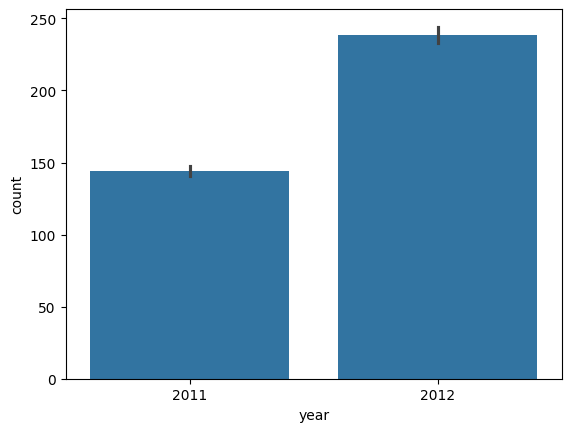

In [101]:
sns.barplot(data=train, x="year", y="count")

### Bicycles Demand by month  

<Axes: xlabel='month', ylabel='count'>

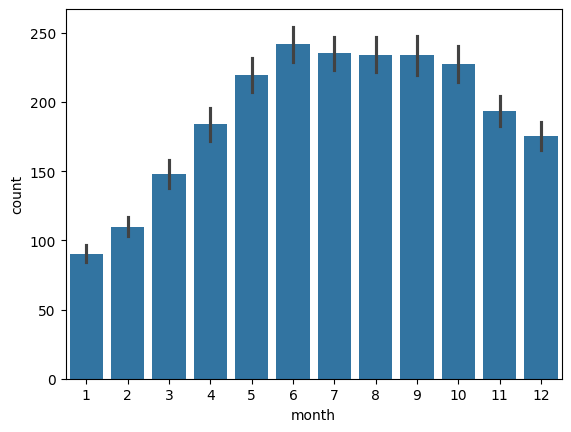

In [102]:
sns.barplot(data=train, x="month", y="count")

### Bicycles Demand by day  

<Axes: xlabel='day', ylabel='count'>

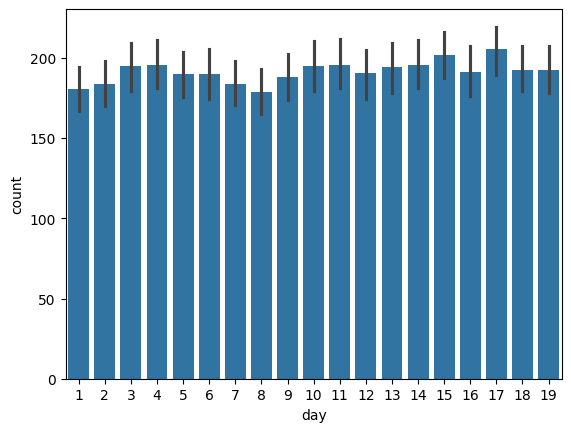

In [103]:
sns.barplot(data=train, x="day", y="count")

### Bicycles Demand by season  

<Axes: xlabel='season', ylabel='count'>

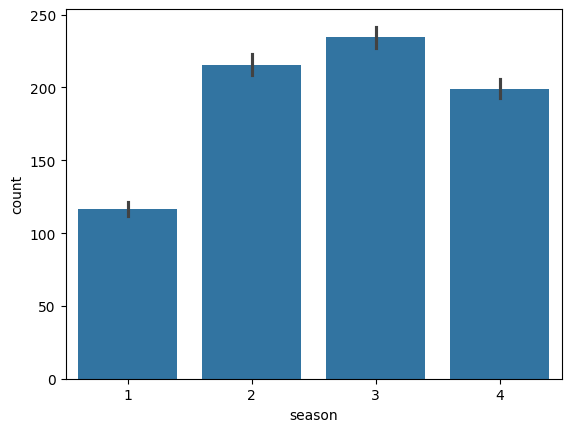

In [104]:
sns.barplot(data=train, x="season", y="count")

In [105]:
print(train[train["season"] == 1].month.unique())
print(train[train["season"] == 2].month.unique())
print(train[train["season"] == 3].month.unique())
print(train[train["season"] == 4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


### Point plot by timeline

<Axes: xlabel='hour', ylabel='count'>

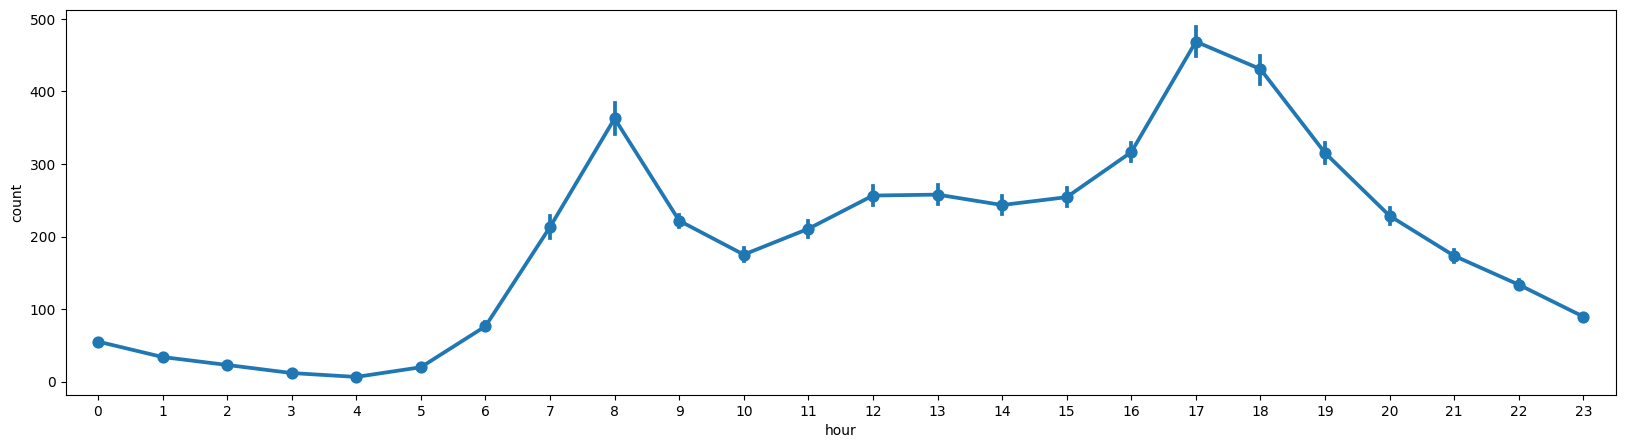

In [106]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)

### Assertain: Category - Workingday, Point plot by timeline

<Axes: xlabel='hour', ylabel='count'>

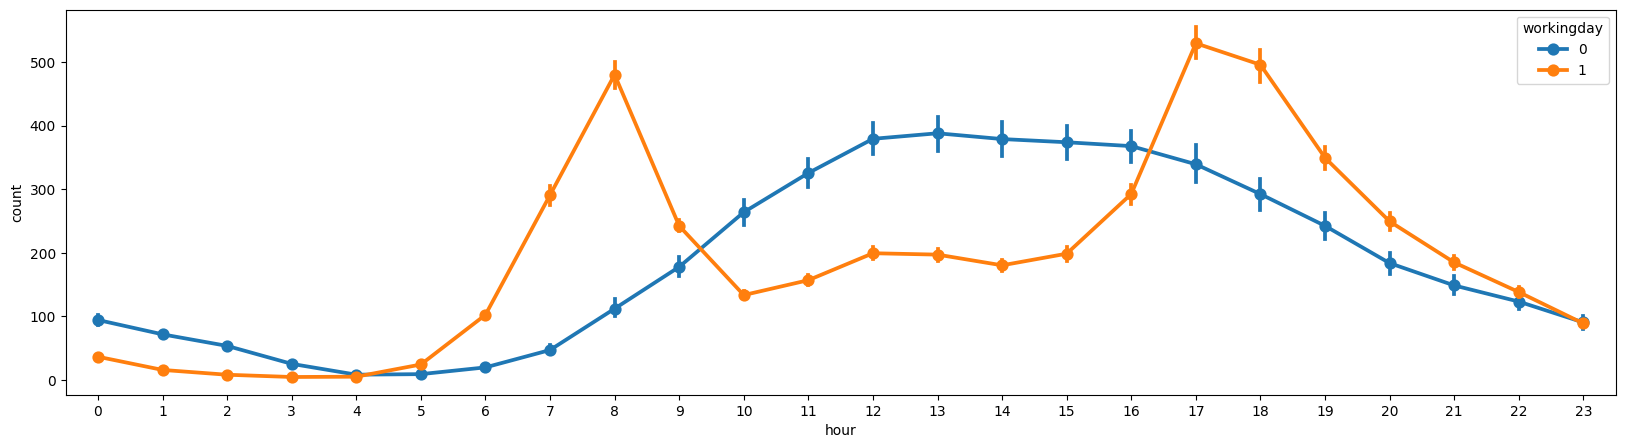

In [107]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax1)

### Assertain: Category - Holiday, Point plot by timeline

<Axes: xlabel='hour', ylabel='count'>

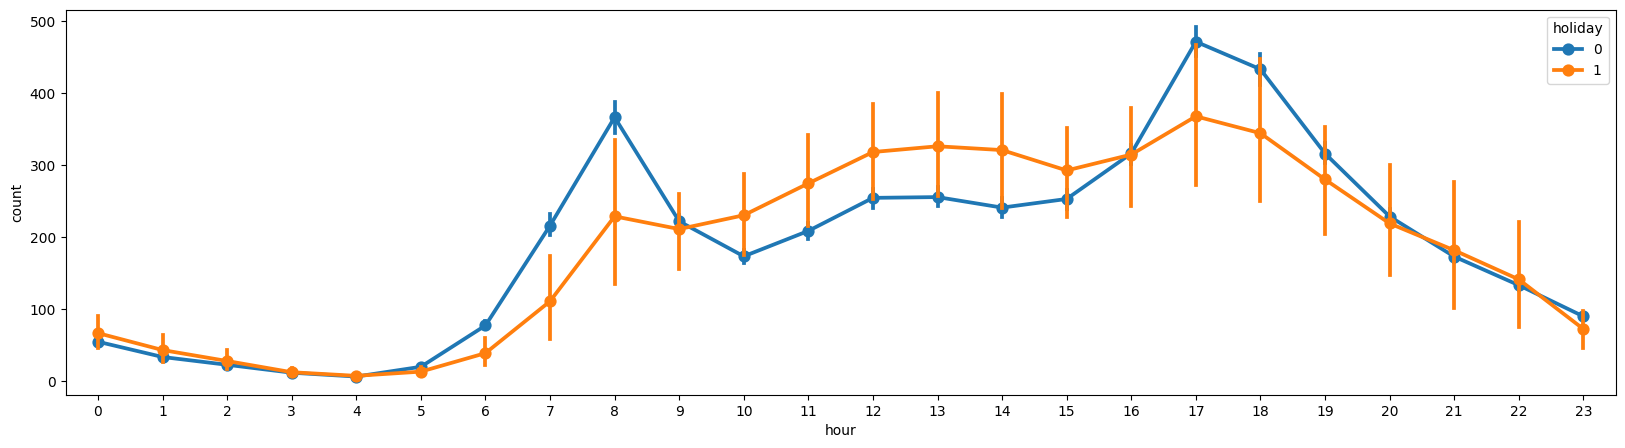

In [108]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data=train, x="hour", y="count", hue="holiday", ax=ax1)

### Assertain: Category - Weather, Point plot by timeline

<Axes: xlabel='hour', ylabel='count'>

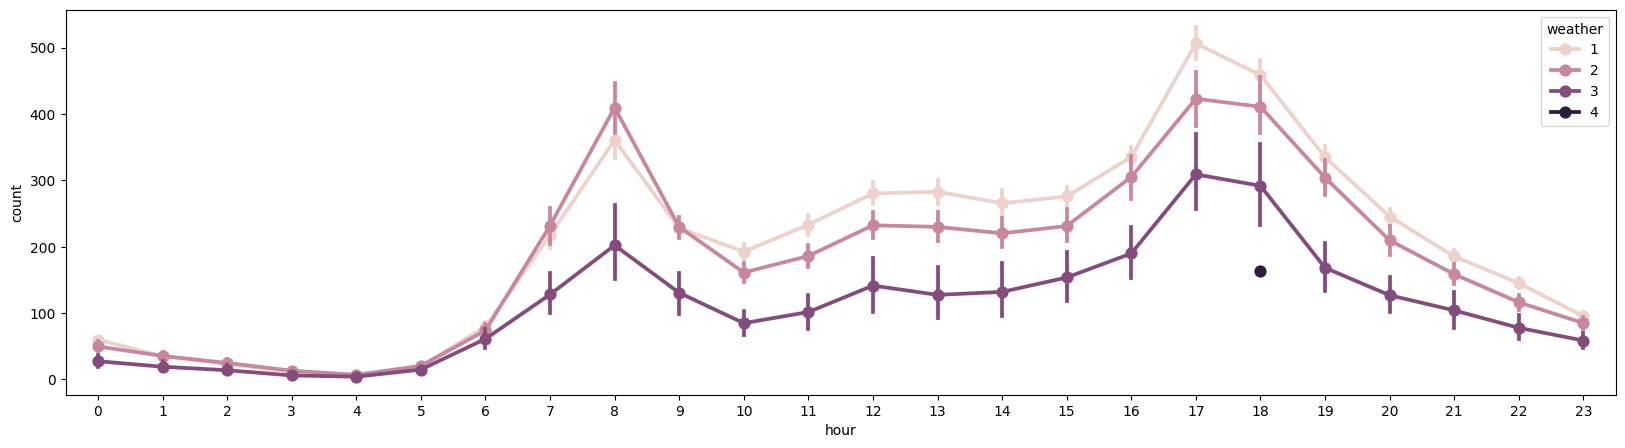

In [109]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax1)

### Assertain: Category - Dayofweek, Point plot by timeline

<Axes: xlabel='hour', ylabel='count'>

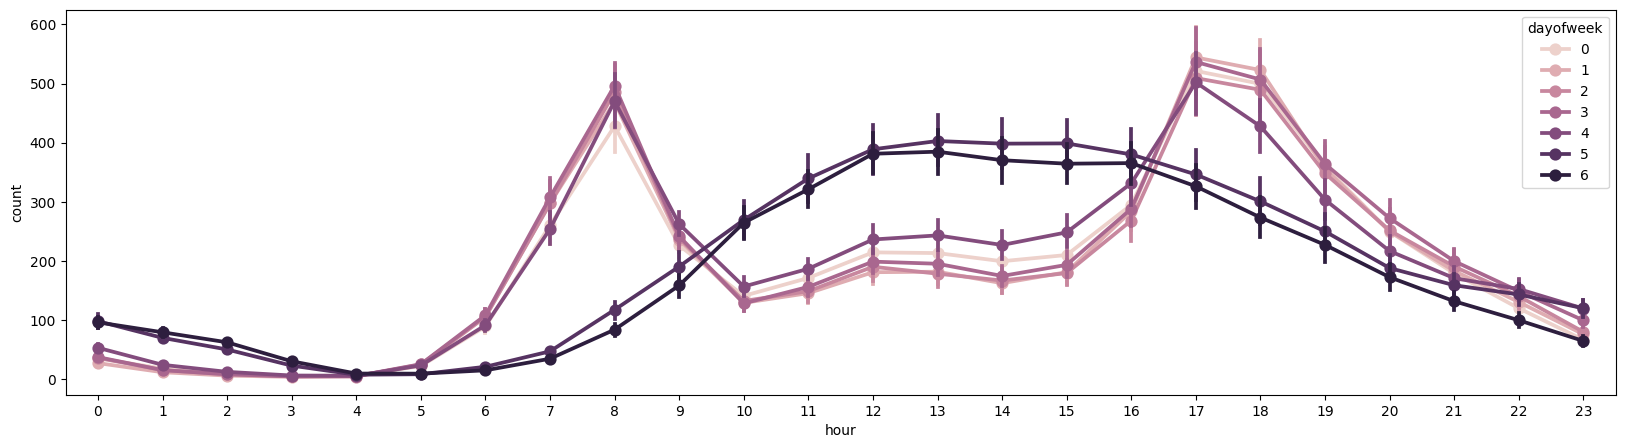

In [110]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax1)

### Correlation Between Variables

<Axes: >

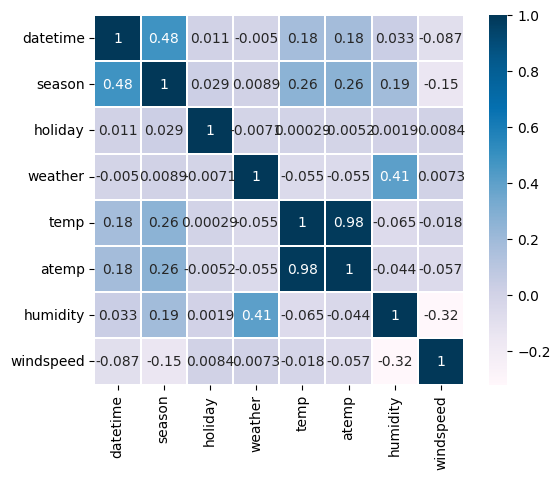

In [111]:
corr_data = train[
    [
        "datetime",
        "season",
        "holiday",
        "weather",
        "temp",
        "atemp",
        "humidity",
        "windspeed",
    ]
]
colormap = plt.cm.PuBu
sns.heatmap(corr_data.corr(), linewidths=0.2, square=True, annot=True, cmap=colormap)

### Examine: Windspeed, Temperature, Humidity

<Axes: xlabel='humidity', ylabel='count'>

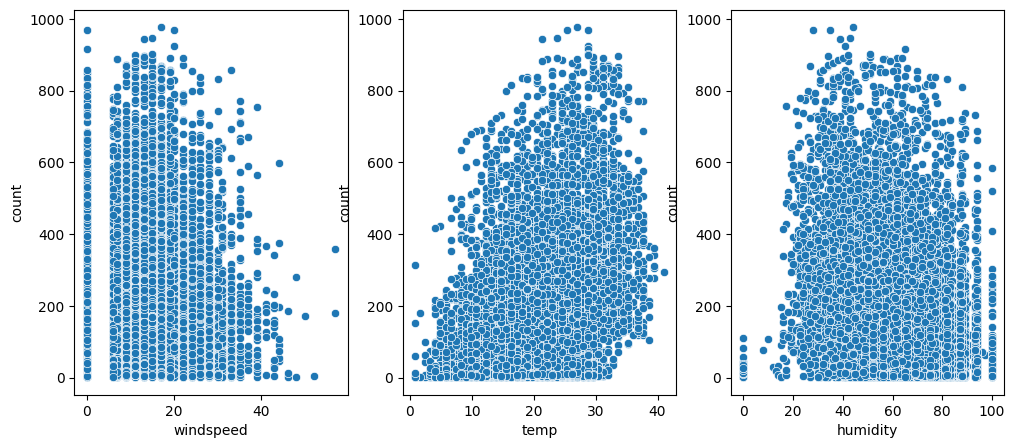

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

sns.scatterplot(data=train, x="windspeed", y="count", ax=ax1)
sns.scatterplot(data=train, x="temp", y="count", ax=ax2)
sns.scatterplot(data=train, x="humidity", y="count", ax=ax3)

In [113]:
len(train[train["windspeed"] == 0])

1313

## Feature Engineering

### Eliminate Outliers
- create boxplot for continuous variables and verify outliers

<Axes: xlabel='count'>

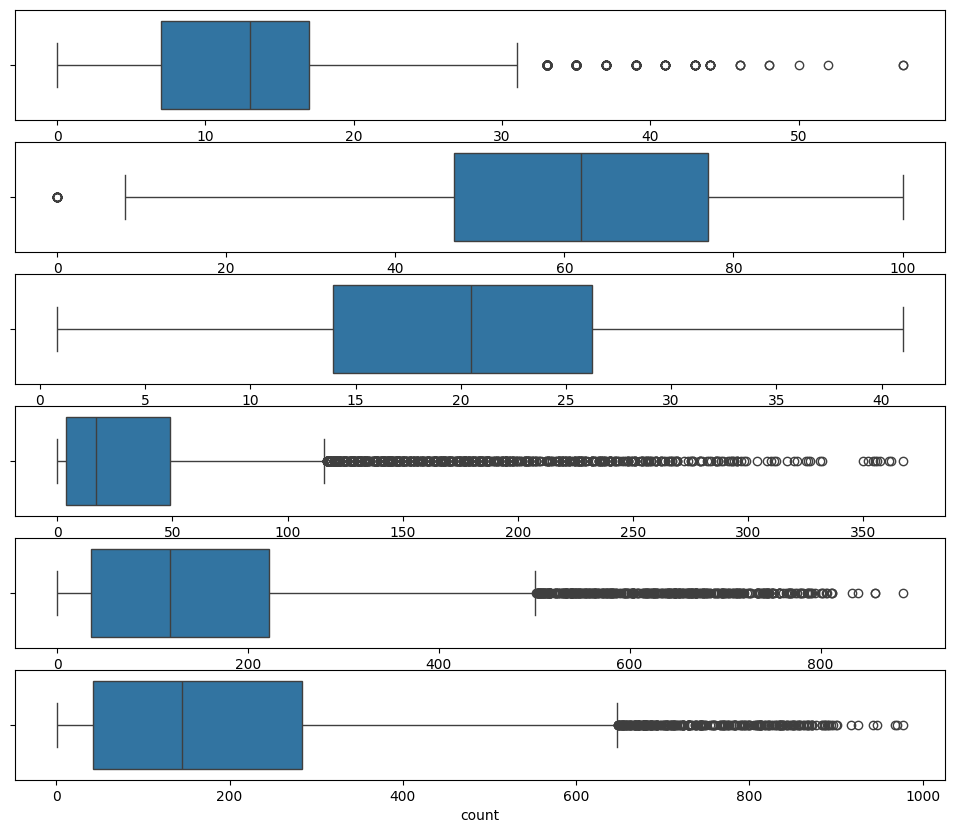

In [114]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, figsize=(12, 10))
sns.boxplot(data=train, x="windspeed", ax=ax1)
sns.boxplot(data=train, x="humidity", ax=ax2)
sns.boxplot(data=train, x="temp", ax=ax3)
sns.boxplot(data=train, x="casual", ax=ax4)
sns.boxplot(data=train, x="registered", ax=ax5)
sns.boxplot(data=train, x="count", ax=ax6)

### Outlier Removal by IQR

In [115]:
from collections import Counter


def detect_outliers(data, n, cols):
    outlier_indices = []
    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = data[
            (data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)
        ].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers


Outliers_to_drop = detect_outliers(
    train,
    2,
    ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"],
)

In [116]:
train.shape

(10886, 19)

In [117]:
train = train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
train.shape

(10846, 19)

- Infinitestimal, yet it can be confirmed that outliers have been removed.

## Examine: Skewness and Kurtosis

skewness: 1.210923
kurtosis: 1.200871


/var/folders/hv/l3dpqz8d40q103ztjt1gfc2c0000gn/T/ipykernel_55023/808137233.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(


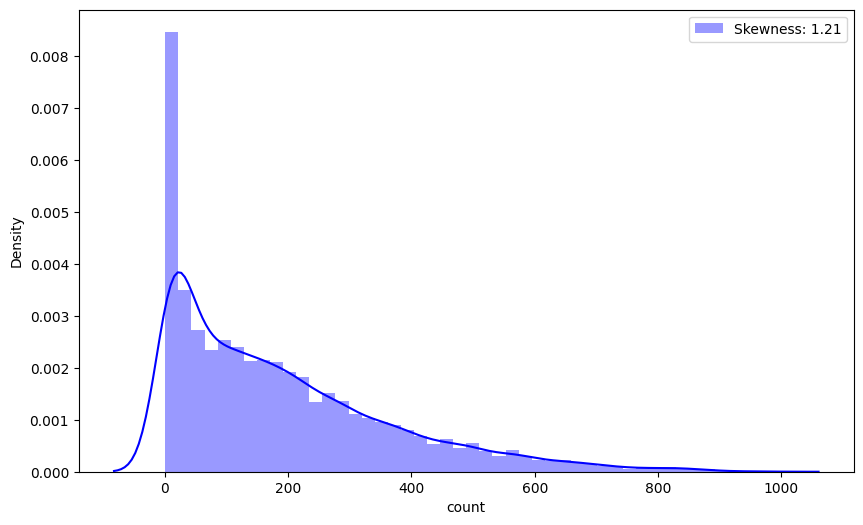

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

graph = sns.distplot(
    train["count"],
    color="b",
    label="Skewness: {:.2f}".format(train["count"].skew()),
    ax=ax,
)

graph.legend(loc="best")

print("skewness: %f" % train["count"].skew())
print("kurtosis: %f" % train["count"].kurt())

### Normalization of count values by log transformation

/var/folders/hv/l3dpqz8d40q103ztjt1gfc2c0000gn/T/ipykernel_55023/2656128238.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(


skewness(왜도): -0.975198
kurtosis(첨도): 0.247435


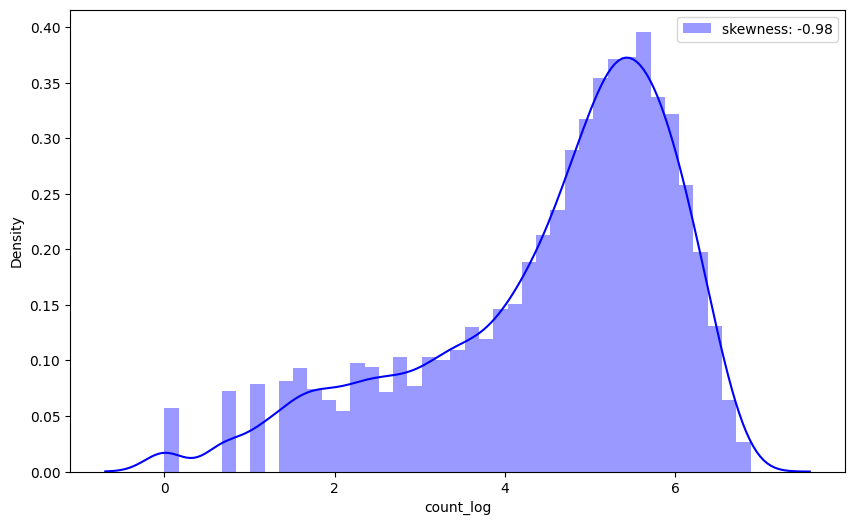

In [119]:
column_name = "count"

train["count_log"] = train[column_name].map(lambda i: np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
graph = sns.distplot(
    train["count_log"],
    color="b",
    label="skewness: {:.2f}".format(train["count_log"].skew()),
    ax=ax,
)
graph.legend(loc="best")

print("skewness(왜도): %f" % train["count_log"].skew())
print("kurtosis(첨도): %f" % train["count_log"].kurt())

### Determining appropriate substitution values for zero wind speed measurements

In [120]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


def predict_windspeed(data):
    wind0 = data.loc[data["windspeed"] == 0].copy()
    windnot0 = data.loc[data["windspeed"] != 0].copy()

    col = ["season", "weather", "temp", "humidity", "atemp", "day"]
    windnot0["windspeed"] = windnot0["windspeed"].astype("str")

    rf = RandomForestClassifier()
    rf.fit(windnot0[col], windnot0["windspeed"])

    pred_wind0 = rf.predict(X=wind0[col])

    wind0["windspeed"] = pred_wind0

    data = pd.concat([windnot0, wind0], ignore_index=True)
    data["windspeed"] = data["windspeed"].astype("float")

    return data

In [121]:
train[train["windspeed"] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,count_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2.772589
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,3.688879
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,3.465736
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2.564949
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,0,0,0,5.446737
10789,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,0,0,0,5.351858
10806,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,0,0,1,6.495266
10820,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,0,0,1,4.882802


<Axes: xlabel='windspeed', ylabel='count'>

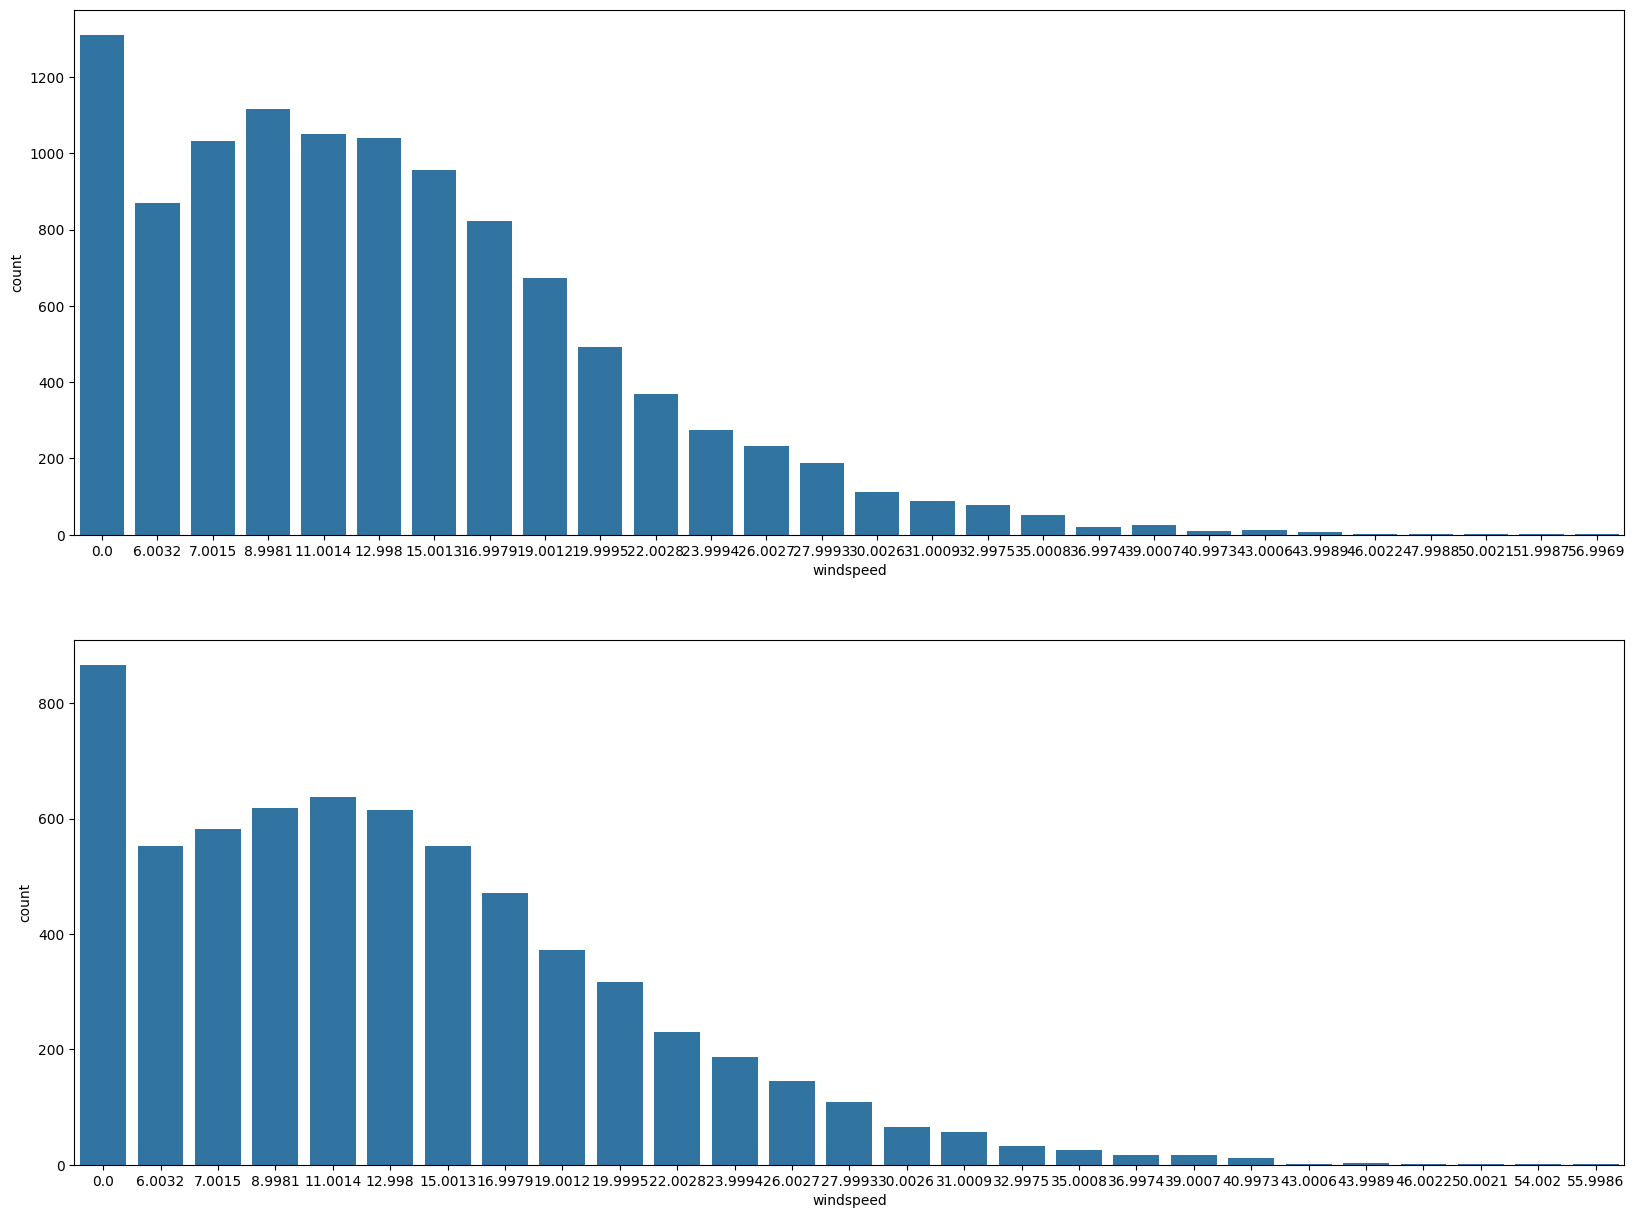

In [122]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(20, 15)

sns.countplot(data=train, x="windspeed", ax=ax1)
sns.countplot(data=test, x="windspeed", ax=ax2)

### Processing categorical variables through one-hot encoding

In [123]:
train = pd.get_dummies(train, columns=["weather"], prefix="weather")
test = pd.get_dummies(test, columns=["weather"], prefix="weather")

train = pd.get_dummies(train, columns=["season"], prefix="season")
test = pd.get_dummies(test, columns=["season"], prefix="season")

train = pd.get_dummies(train, columns=["holiday"], prefix="holiday")
test = pd.get_dummies(test, columns=["holiday"], prefix="holiday")

In [124]:
train.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'dayofweek', 'count_log', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1'],
      dtype='object')

In [125]:
test.columns

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1'],
      dtype='object')

## Modeling

### Selection of Variables for the Train Dataset

In [126]:
print(test.columns)

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1'],
      dtype='object')


In [127]:
if "datetime" in test.columns:
    test.drop("datetime", axis=1, inplace=True)

columns_to_drop = ["workingday", "atemp", "minute", "second"]
existing_columns = [col for col in columns_to_drop if col in test.columns]
test.drop(existing_columns, axis=1, inplace=True)

train_columns_to_drop = [
    "datetime",
    "workingday",
    "atemp",
    "registered",
    "casual",
    "minute",
    "second",
]
existing_train_columns = [col for col in train_columns_to_drop if col in train.columns]
train.drop(existing_train_columns, axis=1, inplace=True)

In [128]:
train.columns

Index(['temp', 'humidity', 'windspeed', 'count', 'year', 'month', 'day',
       'hour', 'dayofweek', 'count_log', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4',
       'holiday_0', 'holiday_1'],
      dtype='object')

In [129]:
test.columns

Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1'],
      dtype='object')

## Training a Gradient Boosting Model

### Dataset Splitting

In [130]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [133]:
X_train = train.drop(["count_log", "count"], axis=1).values
y_train = train["count_log"].values

X_test = test.values

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=2000
)

### Modeling and Training

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

In [135]:
X_train[0]

array([28.7, 61, 6.0032, 2012, 5, 15, 18, 1, True, False, False, False,
       False, True, False, False, True, False], dtype=object)

In [136]:
regressor = GradientBoostingRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=5,
    min_samples_leaf=15,
    min_samples_split=10,
    random_state=42,
)
# model.fit(x, y)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

### Model Performance Evaluation

In [137]:
score_train = regressor.score(X_train, y_train)
score_val = regressor.score(X_val, y_val)

print("train score: %f" % score_train)
print("validation score: %f" % score_val)

train score: 0.986662
validation score: 0.954515


## Model Prediction and Submission File Generation

In [138]:
X_test.shape

(6493, 18)

In [139]:
pred = regressor.predict(X_test)

In [140]:
sample = pd.read_csv("sampleSubmission.csv")
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
submission = pd.read_csv("submission_format.csv")
submission["count"] = np.exp(pred)
submission

,datetime,count
0,2011-01-20 00:00:00,8.635656
1,2011-01-20 01:00:00,3.966558
2,2011-01-20 02:00:00,2.539310
3,2011-01-20 03:00:00,1.875661
4,2011-01-20 04:00:00,1.224376
...,...,...
6488,2012-12-31 19:00:00,277.951730
6489,2012-12-31 20:00:00,206.960353
6490,2012-12-31 21:00:00,141.316449
6491,2012-12-31 22:00:00,102.645230


In [ ]:
submission.to_csv("submission.csv", index=False)